In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
%load_ext autoreload
%autoreload 1
%aimport utils_analysis
ua = utils_analysis

In [3]:
res_df = pd.read_csv('experiments/mortality|n_od=500/res.csv')

In [4]:
alpha_col_str_template ='{:0.1f}'
res_df['f_u_alpha'] = res_df['f_u_alpha'].map(alpha_col_str_template.format)
#res_df['f_u_alpha'] = res_df['f_u_alpha'].astype(float)

In [5]:
engineered_res_df = res_df[res_df['f_u_type']=='engineered']
engineered_res_df = engineered_res_df.rename(columns={'f_u_alpha': 'f_u_alpha_opt'})

_optimization_res_dfs = []
for alpha_sel in np.arange(0.0, 1.1, 0.1):
    _ = engineered_res_df.copy()
    _['f_u_alpha_sel'] = alpha_sel
    _['f_u_alpha_sel'] = alpha_col_str_template.format(alpha_sel)
    _['WC_Score(ue)'] = alpha_sel* _['AUROC(f_u,ue)'] + (1-alpha_sel)* _['RBC(ue)']
    
    _optimization_idx = _.groupby(['f_o_name', 'f_u_alpha_opt', 'f_u_alpha_sel'])['WC_Score(ue)'].idxmax()
    _optimization_res_df = _.loc[_optimization_idx]
    _optimization_res_dfs.append(_optimization_res_df)


optimization_res_df = pd.concat(_optimization_res_dfs)
optimization_res_df.set_index(['f_o_rep', 'f_u_alpha_opt', 'f_u_alpha_sel'])

f_o_name  f_o_C  AUROC(f_o,od)  \
f_o_rep f_u_alpha_opt f_u_alpha_sel                                   
0       0.0           0.0                   0   0.10       0.998638   
        0.1           0.0                   0   0.10       0.998638   
        0.2           0.0                   0   0.10       0.998638   
        0.3           0.0                   0   0.10       0.998638   
        0.4           0.0                   0   0.10       0.998638   
...                                       ...    ...            ...   
39      0.6           1.0                  39   0.01       1.000000   
        0.7           1.0                  39   0.01       1.000000   
        0.8           1.0                  39   0.01       1.000000   
        0.9           1.0                  39   0.01       1.000000   
        1.0           1.0                  39   0.01       1.000000   

                                     AUROC(f_o,oe)  AUROC(f_o,ud)  \
f_o_rep f_u_alpha_opt f_u_alpha_sel                                 
0       0.0           0.0                 0.777045       0.799334   
        0.1           0.0                 0.777045       0.799334   
        0.2           0.0                 0.777045       0.799334   
        0.3           0.0                 0.777045       0.799334   
        0.4           0.0                 0.777045       0.799334   
...                                            ...            ...   
39      0.6           1.0                 0.813959       0.785515   
        0.7           1.0                 0.813959       0.785515   
        0.8           1.0                 0.813959       0.785515   
        0.9           1.0                 0.813959       0.785515   
        1.0           1.0                 0.813959       0.785515   

                                     AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  \
f_o_rep f_u_alpha_opt f_u_alpha_sel                                             
0       0.0           0.0                 0.782780       0.80381  00000_00011   
        0.1           0.0                 0.782780       0.80381  00000_00001   
        0.2           0.0                 0.782780       0.80381  00000_00002   
        0.3           0.0                 0.782780       0.80381  00000_00014   
        0.4           0.0                 0.782780       0.80381  00000_00015   
...                                            ...           ...          ...   
39      0.6           1.0                 0.772631       0.77089  00000_00006   
        0.7           1.0                 0.772631       0.77089  00000_00007   
        0.8           1.0                 0.772631       0.77089  00000_00008   
        0.9           1.0                 0.772631       0.77089  00000_00009   
        1.0           1.0                 0.772631       0.77089  00000_00010   

                                     f_u_C    f_u_type  AUROC(f_u,ud)  \
f_o_rep f_u_alpha_opt f_u_alpha_sel                                     
0       0.0           0.0            0.010  engineered       0.920515   
        0.1           0.0            0.001  engineered       0.919776   
        0.2           0.0            0.001  engineered       0.948430   
        0.3           0.0            0.010  engineered       0.961006   
        0.4           0.0            0.010  engineered       0.965137   
...                                    ...         ...            ...   
39      0.6           1.0            0.001  engineered       0.997257   
        0.7           1.0            0.001  engineered       0.998457   
        0.8           1.0            0.001  engineered       0.999816   
        0.9           1.0            0.001  engineered       0.999238   
        1.0           1.0            0.001  engineered       0.999143   

                                     AUROC(f_u,ue)  AUROC(f_u,e)   RBC(ud)  \
f_o_rep f_u_alpha_opt f_u_alpha_sel                                          
0       0.0           0.0                 0.818868     

In [6]:
selection_options_res_df = res_df[res_df['f_u_type']=='standard']


selection_options_res_df = selection_options_res_df.drop(columns=['f_u_alpha'])
selection_options_res_df

,f_o_name,f_o_rep,f_o_C,"AUROC(f_o,od)","AUROC(f_o,oe)","AUROC(f_o,ud)","AUROC(f_o,ue)","AUROC(f_o,e)",f_u_name,f_u_C,f_u_type,"AUROC(f_u,ud)","AUROC(f_u,ue)","AUROC(f_u,e)",RBC(ud),RBC(ue),RBC(e)
0,28,28,0.001,1.0,0.792738,0.748452,0.768781,0.751189,00002_00001,0.010,standard,0.996508,0.835203,0.837647,0.999952,0.924692,0.930773
1,28,28,0.001,1.0,0.792738,0.748452,0.768781,0.751189,00009_00000,0.001,standard,0.999903,0.812400,0.811542,0.999848,0.923982,0.927242
2,28,28,0.001,1.0,0.792738,0.748452,0.768781,0.751189,00040_00002,0.100,standard,0.970056,0.825218,0.824666,0.969074,0.913610,0.913395
3,28,28,0.001,1.0,0.792738,0.748452,0.768781,0.751189,00024_00000,0.001,standard,0.998056,0.811413,0.812428,0.998244,0.932828,0.940036
4,28,28,0.001,1.0,0.792738,0.748452,0.768781,0.751189,00045_00001,0.010,standard,0.999516,0.832864,0.833209,0.999315,0.912843,0.917427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7314,17,17,0.010,1.0,0.790932,0.802398,0.753577,0.771759,00019_00001,0.010,standard,0.999315,0.824815,0.812661,0.999273,0.934892,0.918589
7316,17,17,0.010,1.0,0.790932,0.802398,0.753577,0.771759,00031_00002,0.100,standard,0.968474,0.810062,0.802173,0.969566,0.930861,0.916060
7317,17,17,0.010,1.0,0.790932,0.802398,0.753577,0.771759,00017_00002,0.100,standard,0.968611,0.805645,0.807765,0.967598,0.923102,0.920742
7318,17,17,0.010,1.0,0.790932,0.802398,0.753577,0.771759,00001_00000,0.001,standard,0.999429,0.825017,0.827115,0.999992,0.943618,0.936627


In [7]:
selection_tradeoff_res_df = ua.selection_tradeoff(selection_options_res_df, 
                                                  sx_name='AUROC(f_u,ue)', 
                                                  sy_name='RBC(ue)')
_keep_cols = [c for c in selection_tradeoff_res_df.columns if 'alpha=' not in c]
selection_tradeoff_res_df

,f_o_name,f_o_rep,f_o_C,"AUROC(f_o,od)","AUROC(f_o,oe)","AUROC(f_o,ud)","AUROC(f_o,ue)","AUROC(f_o,e)",f_u_name,f_u_C,...,alpha=0.1,alpha=0.2,alpha=0.3,alpha=0.4,alpha=0.5,alpha=0.6,alpha=0.7,alpha=0.8,alpha=0.9,alpha=1.0
76,28,28,0.001,1.000000,0.792738,0.748452,0.768781,0.751189,00003_00001,0.010,...,0.923943,0.914336,0.904730,0.895123,0.885517,0.875910,0.866304,0.856697,0.847090,0.837484
79,28,28,0.001,1.000000,0.792738,0.748452,0.768781,0.751189,00004_00000,0.001,...,0.933337,0.921999,0.910660,0.899322,0.887984,0.876645,0.865307,0.853968,0.842630,0.831292
92,28,28,0.001,1.000000,0.792738,0.748452,0.768781,0.751189,00005_00002,0.100,...,0.934862,0.923048,0.911233,0.899418,0.887604,0.875789,0.863974,0.852160,0.840345,0.828530
151,11,11,0.001,1.000000,0.816139,0.794207,0.793448,0.789872,00009_00000,0.001,...,0.921893,0.912362,0.902831,0.893299,0.883768,0.874237,0.864706,0.855175,0.845644,0.836113
224,11,11,0.001,1.000000,0.816139,0.794207,0.793448,0.789872,00009_00001,0.010,...,0.916538,0.907879,0.899219,0.890559,0.881899,0.873239,0.864579,0.855919,0.847259,0.838599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679,3,3,0.001,1.000000,0.741899,0.763926,0.763404,0.752700,00004_00001,0.010,...,0.931136,0.922435,0.913733,0.905031,0.896330,0.887628,0.878926,0.870224,0.861523,0.852821
5829,8,8,0.100,0.997491,0.805391,0.769805,0.809206,0.799839,00004_00001,0.010,...,0.929945,0.920690,0.911435,0.902180,0.892925,0.883670,0.874415,0.865160,0.855905,0.846650
5834,8,8,0.100,0.997491,0.805391,0.769805,0.809206,0.799839,00036_00002,0.100,...,0.939266,0.927744,0.916221,0.904699,0.893176,0.881654,0.870131,0.858609,0.847086,0.835564
5882,17,17,0.010,1.000000,0.790932,0.802398,0.753577,0.771759,00002_00000,0.001,...,0.938255,0.925494,0.912734,0.899974,0.887213,0.874453,0.861692,0.848932,0.836171,0.823411


# compare selection vs. optimized for same original and same alpha

In [8]:
alpha_selection_res_dfs = []
for alpha in np.arange(0.0, 1.1, 0.1):
    alpha_idxmax = selection_tradeoff_res_df.groupby('f_o_rep')['alpha={:0.1f}'.format(alpha)].idxmax(axis=0)
    alpha_selection_res_df = selection_tradeoff_res_df.loc[alpha_idxmax].copy(deep=True)
    
    alpha_selection_res_df = alpha_selection_res_df[_keep_cols]
    alpha_selection_res_df['f_u_alpha_sel'] = alpha_col_str_template.format(alpha)
    
    alpha_selection_res_dfs.append(alpha_selection_res_df)
    
selection_res_df = pd.concat(alpha_selection_res_dfs)
selection_res_df = selection_res_df.reset_index(drop=True)
selection_res_df = selection_res_df.sort_values(by=['f_o_rep', 'f_u_alpha_sel'])
selection_res_df = selection_res_df.set_index(['f_o_rep', 'f_u_alpha_sel'])
selection_res_df

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  \
f_o_rep f_u_alpha_sel                                                  
0       0.0                   0   0.10       0.998638       0.777045   
        0.1                   0   0.10       0.998638       0.777045   
        0.2                   0   0.10       0.998638       0.777045   
        0.3                   0   0.10       0.998638       0.777045   
        0.4                   0   0.10       0.998638       0.777045   
...                         ...    ...            ...            ...   
39      0.6                  39   0.01       1.000000       0.813959   
        0.7                  39   0.01       1.000000       0.813959   
        0.8                  39   0.01       1.000000       0.813959   
        0.9                  39   0.01       1.000000       0.813959   
        1.0                  39   0.01       1.000000       0.813959   

                       AUROC(f_o,ud)  AUROC(f_o,ue)  AUROC(f_o,e)  \
f_o_rep f_u_alpha_sel                                               
0       0.0                 0.799334       0.782780       0.80381   
        0.1                 0.799334       0.782780       0.80381   
        0.2                 0.799334       0.782780       0.80381   
        0.3                 0.799334       0.782780       0.80381   
        0.4                 0.799334       0.782780       0.80381   
...                              ...            ...           ...   
39      0.6                 0.785515       0.772631       0.77089   
        0.7                 0.785515       0.772631       0.77089   
        0.8                 0.785515       0.772631       0.77089   
        0.9                 0.785515       0.772631       0.77089   
        1.0                 0.785515       0.772631       0.77089   

                          f_u_name  f_u_C  f_u_type  AUROC(f_u,ud)  \
f_o_rep f_u_alpha_sel                                                
0       0.0            00008_00001  0.010  standard       0.968715   
        0.1            00008_00001  0.010  standard       0.968715   
        0.2            00008_00001  0.010  standard       0.968715   
        0.3            00008_00001  0.010  standard       0.968715   
        0.4            00001_00000  0.001  standard       0.990892   
...                            ...    ...       ...            ...   
39      0.6            00002_00000  0.001  standard       0.999276   
        0.7            00002_00000  0.001  standard       0.999276   
        0.8            00002_00000  0.001  standard       0.999276   
        0.9            00002_00000  0.001  standard       0.999276   
        1.0            00002_00000  0.001  standard       0.999276   

                       AUROC(f_u,ue)  AUROC(f_u,e)   RBC(ud)   RBC(ue)  \
f_o_rep f_u_alpha_sel                                                    
0       0.0                 0.836676      0.841298  0.972344  0.965916   
        0.1                 0.836676      0.841298  0.972344  0.965916   
        0.2                 0.836676      0.841298  0.972344  0.965916   
        0.3                 0.836676      0.841298  0.972344  0.965916   
        0.4                 0.852973      0.850794  0.999754  0.956713   
...                              ...           ...       ...       ...   
39      0.6                 0.846773      0.831793  0.999998  0.950665   
        0.7                 0.846773      0.831793  0.999998  0.950665   
        0.8                 0.846773      0.831793  0.999998  0.950665   
        0.9                 0.846773      0.831793  0.999998  0.950665   
        1.0                 0.846773      0.831793  0.999998  0.950665   

                         RBC(e)  
f_o_rep f_u_alpha_sel            
0       0.0            0.961526  
        0.1            0.961526  
        0.2            0.961526  
        0.3            0.961526  
        0.4            0.950784  
...                         ...  
39      0.6            0.938858  
        

In [9]:
comparison_res_df = optimization_res_df.set_index(['f_o_rep', 'f_u_alpha_sel']).join(selection_res_df, 
                                             lsuffix='_optimization', rsuffix='_selection')
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha_sel                                              
0       0.0                                0                0.10   
        0.0                                0                0.10   
        0.0                                0                0.10   
        0.0                                0                0.10   
        0.0                                0                0.10   
...                                      ...                 ...   
39      1.0                               39                0.01   
        1.0                               39                0.01   
        1.0                               39                0.01   
        1.0                               39                0.01   
        1.0                               39                0.01   

                       AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha_sel                                                           
0       0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
...                                           ...                         ...   
39      1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   

                       AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha_sel                                                           
0       0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
...                                           ...                         ...   
39      1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   

                       AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha_sel                                                    
0       0.0                              0.80381           00000_00011   
        0.0                              0.80381           00000_00001   
        0.0                              0.80381           00000_00002   
        0.0                              0.80381           00000_00014   
        0.0                              0.80381           00000_00015   
...                                          ...                   ...   
39      1.0                              0.77089           00000_00006   
        1.0                              0.77089           00000_00007   
        1.0                              0.77089           00000_00008   
        1.0                              0.77089           00000_00009   
        1.0                              0.77089           00000_00010   

                      f_u_alpha_opt  f_u_C_optimization  ...  \
f_o

In [10]:
for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha_sel                                              
0       0.0                                0                0.10   
        0.0                                0                0.10   
        0.0                                0                0.10   
        0.0                                0                0.10   
        0.0                                0                0.10   
...                                      ...                 ...   
39      1.0                               39                0.01   
        1.0                               39                0.01   
        1.0                               39                0.01   
        1.0                               39                0.01   
        1.0                               39                0.01   

                       AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha_sel                                                           
0       0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
        0.0                              0.998638                    0.777045   
...                                           ...                         ...   
39      1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   
        1.0                              1.000000                    0.813959   

                       AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha_sel                                                           
0       0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
        0.0                              0.799334                    0.782780   
...                                           ...                         ...   
39      1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   
        1.0                              0.785515                    0.772631   

                       AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha_sel                                                    
0       0.0                              0.80381           00000_00011   
        0.0                              0.80381           00000_00001   
        0.0                              0.80381           00000_00002   
        0.0                              0.80381           00000_00014   
        0.0                              0.80381           00000_00015   
...                                          ...                   ...   
39      1.0                              0.77089           00000_00006   
        1.0                              0.77089           00000_00007   
        1.0                              0.77089           00000_00008   
        1.0                              0.77089           00000_00009   
        1.0                              0.77089           00000_00010   

                      f_u_alpha_opt  f_u_C_optimization  ... f_u_C_

In [11]:
_ = comparison_res_df.groupby(['f_u_alpha_opt', 'f_u_alpha_sel']).describe(percentiles=[0.025, 0.5, 0.975])

In [12]:
ci_string_template = '{:0.3f} ({:0.3f}, {:0.3f})'
for measure in ['RBC(e)_selection', 'RBC(e)_optimization', 'AUROC(f_u,e)_selection', 'AUROC(f_u,e)_optimization', 'ΔRBC(e)', 'ΔAUROC(f_u,e)']:
    _[(measure, 'ci')]= [ci_string_template.format(*r) for r in _[[(measure, 'mean'), (measure, '2.5%'), (measure, '97.5%')]].values.tolist()]

In [13]:
display(_[('ΔRBC(e)', 'ci')].unstack())

f_u_alpha_sel,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
f_u_alpha_opt,,,,,,,,,,,
0.0,"0.021 (0.007, 0.036)","0.021 (0.008, 0.036)","0.022 (0.008, 0.039)","0.022 (0.008, 0.047)","0.023 (0.011, 0.047)","0.024 (0.011, 0.047)","0.027 (0.012, 0.052)","0.028 (0.012, 0.049)","0.030 (0.012, 0.052)","0.032 (0.012, 0.058)","0.034 (0.017, 0.058)"
0.1,"0.021 (0.006, 0.034)","0.022 (0.006, 0.034)","0.022 (0.006, 0.035)","0.022 (0.007, 0.039)","0.023 (0.007, 0.042)","0.024 (0.007, 0.044)","0.026 (0.011, 0.044)","0.027 (0.011, 0.046)","0.029 (0.011, 0.046)","0.030 (0.011, 0.055)","0.032 (0.011, 0.055)"
0.2,"0.020 (0.006, 0.035)","0.021 (0.006, 0.036)","0.021 (0.007, 0.037)","0.021 (0.007, 0.040)","0.023 (0.007, 0.043)","0.024 (0.009, 0.047)","0.025 (0.007, 0.046)","0.026 (0.008, 0.049)","0.028 (0.008, 0.049)","0.030 (0.008, 0.059)","0.031 (0.008, 0.059)"
0.3,"0.020 (0.009, 0.036)","0.020 (0.009, 0.036)","0.020 (0.007, 0.039)","0.020 (0.009, 0.041)","0.021 (0.010, 0.043)","0.023 (0.010, 0.044)","0.025 (0.010, 0.049)","0.026 (0.010, 0.049)","0.028 (0.010, 0.051)","0.029 (0.007, 0.058)","0.030 (0.010, 0.058)"
0.4,"0.019 (0.005, 0.032)","0.019 (0.007, 0.032)","0.019 (0.007, 0.033)","0.019 (0.007, 0.033)","0.019 (0.007, 0.037)","0.020 (0.007, 0.038)","0.023 (0.007, 0.043)","0.024 (0.007, 0.048)","0.025 (0.007, 0.049)","0.027 (0.007, 0.058)","0.029 (0.007, 0.058)"
0.5,"0.017 (0.003, 0.031)","0.017 (0.003, 0.031)","0.017 (0.003, 0.035)","0.018 (0.003, 0.035)","0.018 (0.005, 0.035)","0.019 (0.005, 0.035)","0.018 (0.005, 0.035)","0.018 (0.006, 0.042)","0.019 (0.002, 0.042)","0.021 (0.002, 0.054)","0.022 (0.002, 0.042)"
0.6,"0.014 (0.002, 0.026)","0.014 (0.002, 0.027)","0.014 (0.002, 0.027)","0.014 (0.002, 0.027)","0.015 (0.002, 0.027)","0.016 (0.002, 0.034)","0.015 (0.001, 0.034)","0.013 (-0.007, 0.042)","0.013 (-0.007, 0.041)","0.015 (-0.007, 0.041)","0.016 (0.001, 0.041)"
0.7,"0.007 (-0.007, 0.017)","0.007 (-0.006, 0.017)","0.008 (-0.006, 0.017)","0.008 (-0.004, 0.021)","0.008 (-0.002, 0.021)","0.009 (-0.004, 0.021)","0.010 (-0.006, 0.028)","0.010 (-0.006, 0.035)","0.009 (-0.006, 0.035)","0.009 (-0.006, 0.028)","0.010 (-0.010, 0.028)"
0.8,"0.004 (-0.006, 0.020)","0.004 (-0.004, 0.020)","0.004 (-0.005, 0.020)","0.005 (-0.004, 0.019)","0.005 (-0.004, 0.020)","0.006 (-0.013, 0.020)","0.007 (-0.004, 0.027)","0.006 (-0.010, 0.021)","0.007 (-0.010, 0.030)","0.005 (-0.012, 0.039)","0.006 (-0.013, 0.039)"


In [14]:
display(_[('RBC(e)_selection', 'ci')].unstack().head(1))
display(_[('RBC(e)_optimization', 'ci')].unstack())

f_u_alpha_sel,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
f_u_alpha_opt,,,,,,,,,,,
0.0,"0.951 (0.937, 0.972)","0.951 (0.937, 0.972)","0.951 (0.937, 0.972)","0.950 (0.933, 0.972)","0.949 (0.933, 0.963)","0.947 (0.932, 0.963)","0.945 (0.926, 0.961)","0.943 (0.926, 0.961)","0.942 (0.923, 0.958)","0.939 (0.917, 0.958)","0.938 (0.917, 0.958)"


f_u_alpha_sel,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
f_u_alpha_opt,,,,,,,,,,,
0.0,"0.972 (0.961, 0.981)","0.972 (0.961, 0.981)","0.972 (0.961, 0.981)","0.972 (0.961, 0.981)","0.972 (0.961, 0.981)","0.972 (0.961, 0.980)","0.972 (0.962, 0.980)","0.971 (0.962, 0.980)","0.971 (0.962, 0.980)","0.971 (0.962, 0.980)","0.971 (0.961, 0.980)"
0.1,"0.972 (0.963, 0.980)","0.972 (0.963, 0.980)","0.972 (0.963, 0.980)","0.972 (0.963, 0.980)","0.971 (0.962, 0.980)","0.971 (0.962, 0.980)","0.971 (0.962, 0.980)","0.971 (0.962, 0.980)","0.970 (0.962, 0.980)","0.970 (0.962, 0.980)","0.969 (0.962, 0.980)"
0.2,"0.972 (0.963, 0.982)","0.972 (0.963, 0.982)","0.971 (0.963, 0.982)","0.971 (0.963, 0.982)","0.971 (0.963, 0.981)","0.971 (0.963, 0.980)","0.970 (0.960, 0.980)","0.970 (0.960, 0.980)","0.970 (0.960, 0.980)","0.969 (0.960, 0.980)","0.969 (0.956, 0.980)"
0.3,"0.971 (0.958, 0.980)","0.971 (0.958, 0.980)","0.971 (0.958, 0.980)","0.970 (0.958, 0.981)","0.970 (0.958, 0.981)","0.970 (0.958, 0.981)","0.970 (0.958, 0.981)","0.970 (0.958, 0.981)","0.969 (0.954, 0.981)","0.969 (0.953, 0.981)","0.968 (0.953, 0.981)"
0.4,"0.970 (0.957, 0.981)","0.970 (0.957, 0.981)","0.969 (0.957, 0.981)","0.969 (0.957, 0.981)","0.968 (0.957, 0.981)","0.968 (0.957, 0.978)","0.968 (0.957, 0.978)","0.967 (0.956, 0.978)","0.967 (0.956, 0.978)","0.966 (0.956, 0.978)","0.966 (0.956, 0.978)"
0.5,"0.968 (0.953, 0.979)","0.968 (0.953, 0.979)","0.967 (0.950, 0.979)","0.967 (0.950, 0.979)","0.966 (0.948, 0.979)","0.966 (0.948, 0.981)","0.963 (0.942, 0.981)","0.961 (0.942, 0.981)","0.961 (0.942, 0.981)","0.961 (0.942, 0.981)","0.959 (0.940, 0.977)"
0.6,"0.965 (0.943, 0.976)","0.965 (0.943, 0.976)","0.965 (0.943, 0.976)","0.964 (0.943, 0.978)","0.964 (0.943, 0.978)","0.963 (0.942, 0.978)","0.960 (0.942, 0.978)","0.956 (0.937, 0.978)","0.954 (0.935, 0.973)","0.954 (0.935, 0.973)","0.954 (0.935, 0.973)"
0.7,"0.958 (0.937, 0.979)","0.958 (0.937, 0.979)","0.958 (0.937, 0.979)","0.957 (0.939, 0.979)","0.957 (0.939, 0.979)","0.956 (0.939, 0.979)","0.955 (0.939, 0.979)","0.953 (0.934, 0.967)","0.951 (0.924, 0.966)","0.948 (0.924, 0.964)","0.947 (0.924, 0.964)"
0.8,"0.955 (0.937, 0.969)","0.955 (0.937, 0.969)","0.955 (0.937, 0.969)","0.955 (0.937, 0.968)","0.954 (0.937, 0.968)","0.953 (0.935, 0.968)","0.952 (0.934, 0.968)","0.950 (0.923, 0.967)","0.948 (0.923, 0.967)","0.945 (0.923, 0.967)","0.944 (0.923, 0.967)"


In [15]:
display(_[('ΔAUROC(f_u,e)', 'ci')].unstack())

f_u_alpha_sel,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
f_u_alpha_opt,,,,,,,,,,,
0.0,"-0.009 (-0.033, 0.010)","-0.013 (-0.034, 0.007)","-0.015 (-0.033, 0.006)","-0.016 (-0.033, 0.003)","-0.017 (-0.034, 0.003)","-0.019 (-0.037, 0.003)","-0.020 (-0.037, -0.002)","-0.020 (-0.037, -0.002)","-0.021 (-0.040, -0.002)","-0.020 (-0.040, -0.002)","-0.019 (-0.040, 0.001)"
0.1,"-0.007 (-0.037, 0.006)","-0.012 (-0.037, 0.006)","-0.015 (-0.037, 0.005)","-0.015 (-0.033, 0.003)","-0.016 (-0.036, 0.003)","-0.017 (-0.036, 0.003)","-0.018 (-0.036, -0.003)","-0.019 (-0.042, -0.004)","-0.020 (-0.042, -0.007)","-0.018 (-0.041, -0.004)","-0.018 (-0.041, -0.004)"
0.2,"-0.007 (-0.031, 0.014)","-0.011 (-0.031, 0.008)","-0.013 (-0.031, 0.008)","-0.013 (-0.031, 0.003)","-0.014 (-0.034, 0.003)","-0.016 (-0.034, 0.003)","-0.017 (-0.034, -0.001)","-0.018 (-0.037, 0.001)","-0.018 (-0.038, -0.003)","-0.018 (-0.038, -0.000)","-0.018 (-0.038, -0.000)"
0.3,"-0.005 (-0.034, 0.011)","-0.009 (-0.034, 0.009)","-0.010 (-0.030, 0.008)","-0.010 (-0.030, 0.009)","-0.012 (-0.030, 0.007)","-0.013 (-0.030, 0.003)","-0.014 (-0.030, 0.001)","-0.015 (-0.039, -0.000)","-0.016 (-0.039, -0.002)","-0.015 (-0.033, 0.000)","-0.015 (-0.033, 0.000)"
0.4,"-0.003 (-0.027, 0.016)","-0.007 (-0.032, 0.011)","-0.009 (-0.032, 0.011)","-0.009 (-0.025, 0.006)","-0.010 (-0.032, 0.006)","-0.011 (-0.029, 0.006)","-0.012 (-0.029, 0.001)","-0.012 (-0.029, -0.000)","-0.013 (-0.029, -0.002)","-0.012 (-0.029, 0.002)","-0.012 (-0.029, 0.002)"
0.5,"-0.000 (-0.025, 0.018)","-0.005 (-0.025, 0.011)","-0.007 (-0.027, 0.011)","-0.008 (-0.027, 0.008)","-0.008 (-0.030, 0.013)","-0.009 (-0.030, 0.011)","-0.008 (-0.027, 0.003)","-0.007 (-0.027, 0.002)","-0.008 (-0.026, 0.002)","-0.007 (-0.026, 0.004)","-0.007 (-0.026, 0.006)"
0.6,"0.002 (-0.020, 0.020)","-0.003 (-0.023, 0.018)","-0.005 (-0.023, 0.013)","-0.005 (-0.023, 0.008)","-0.006 (-0.026, 0.007)","-0.006 (-0.027, 0.007)","-0.004 (-0.020, 0.007)","-0.004 (-0.016, 0.005)","-0.005 (-0.015, 0.002)","-0.004 (-0.015, 0.005)","-0.004 (-0.016, 0.005)"
0.7,"0.004 (-0.016, 0.024)","-0.001 (-0.028, 0.024)","-0.003 (-0.020, 0.019)","-0.002 (-0.017, 0.015)","-0.002 (-0.017, 0.012)","-0.003 (-0.017, 0.010)","-0.003 (-0.013, 0.007)","-0.003 (-0.016, 0.007)","-0.003 (-0.015, 0.006)","-0.002 (-0.013, 0.009)","-0.002 (-0.015, 0.009)"
0.8,"0.009 (-0.003, 0.025)","0.004 (-0.016, 0.025)","0.001 (-0.016, 0.017)","0.001 (-0.014, 0.016)","0.000 (-0.014, 0.016)","-0.000 (-0.011, 0.016)","-0.001 (-0.008, 0.006)","-0.002 (-0.014, 0.008)","-0.003 (-0.014, 0.005)","-0.001 (-0.010, 0.008)","-0.001 (-0.010, 0.008)"


In [16]:
display(_[('AUROC(f_u,e)_selection', 'ci')].unstack().head(1))
display(_[('AUROC(f_u,e)_optimization', 'ci')].unstack())

f_u_alpha_sel,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
f_u_alpha_opt,,,,,,,,,,,
0.0,"0.825 (0.801, 0.847)","0.830 (0.801, 0.854)","0.833 (0.812, 0.854)","0.834 (0.817, 0.854)","0.836 (0.817, 0.854)","0.837 (0.817, 0.856)","0.839 (0.820, 0.856)","0.839 (0.820, 0.856)","0.840 (0.822, 0.856)","0.840 (0.817, 0.856)","0.839 (0.817, 0.856)"


f_u_alpha_sel,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
f_u_alpha_opt,,,,,,,,,,,
0.0,"0.817 (0.793, 0.841)","0.817 (0.793, 0.841)","0.818 (0.793, 0.841)","0.818 (0.794, 0.841)","0.819 (0.794, 0.841)","0.819 (0.794, 0.841)","0.819 (0.794, 0.841)","0.819 (0.797, 0.841)","0.819 (0.797, 0.841)","0.820 (0.798, 0.841)","0.820 (0.798, 0.841)"
0.1,"0.818 (0.793, 0.841)","0.818 (0.793, 0.841)","0.818 (0.795, 0.841)","0.819 (0.797, 0.843)","0.820 (0.797, 0.845)","0.820 (0.797, 0.845)","0.820 (0.797, 0.845)","0.820 (0.797, 0.845)","0.821 (0.797, 0.846)","0.821 (0.798, 0.846)","0.821 (0.798, 0.846)"
0.2,"0.819 (0.794, 0.841)","0.820 (0.794, 0.841)","0.820 (0.794, 0.841)","0.821 (0.794, 0.841)","0.822 (0.794, 0.841)","0.822 (0.794, 0.841)","0.822 (0.794, 0.841)","0.822 (0.794, 0.841)","0.822 (0.794, 0.841)","0.822 (0.794, 0.841)","0.822 (0.794, 0.841)"
0.3,"0.821 (0.798, 0.847)","0.821 (0.798, 0.847)","0.823 (0.799, 0.847)","0.824 (0.799, 0.847)","0.824 (0.799, 0.847)","0.824 (0.799, 0.847)","0.824 (0.799, 0.847)","0.824 (0.799, 0.847)","0.825 (0.799, 0.847)","0.825 (0.799, 0.847)","0.824 (0.799, 0.846)"
0.4,"0.823 (0.801, 0.846)","0.823 (0.801, 0.846)","0.824 (0.801, 0.846)","0.826 (0.802, 0.846)","0.826 (0.802, 0.847)","0.827 (0.803, 0.852)","0.827 (0.803, 0.852)","0.827 (0.805, 0.852)","0.827 (0.805, 0.853)","0.827 (0.805, 0.853)","0.827 (0.805, 0.853)"
0.5,"0.825 (0.801, 0.855)","0.825 (0.801, 0.855)","0.826 (0.801, 0.855)","0.826 (0.801, 0.855)","0.828 (0.804, 0.855)","0.828 (0.804, 0.855)","0.830 (0.805, 0.855)","0.832 (0.811, 0.855)","0.833 (0.811, 0.855)","0.833 (0.811, 0.855)","0.833 (0.808, 0.855)"
0.6,"0.827 (0.810, 0.851)","0.828 (0.810, 0.851)","0.828 (0.810, 0.853)","0.829 (0.810, 0.853)","0.830 (0.810, 0.854)","0.831 (0.810, 0.854)","0.834 (0.817, 0.854)","0.835 (0.820, 0.854)","0.836 (0.820, 0.854)","0.836 (0.820, 0.854)","0.836 (0.819, 0.854)"
0.7,"0.829 (0.810, 0.850)","0.829 (0.810, 0.850)","0.830 (0.811, 0.850)","0.832 (0.811, 0.850)","0.834 (0.818, 0.850)","0.835 (0.818, 0.850)","0.836 (0.818, 0.855)","0.837 (0.820, 0.855)","0.837 (0.823, 0.855)","0.838 (0.823, 0.859)","0.838 (0.821, 0.859)"
0.8,"0.834 (0.818, 0.850)","0.834 (0.818, 0.850)","0.834 (0.818, 0.850)","0.835 (0.820, 0.850)","0.836 (0.820, 0.852)","0.837 (0.821, 0.853)","0.837 (0.821, 0.853)","0.838 (0.821, 0.853)","0.837 (0.821, 0.853)","0.838 (0.821, 0.854)","0.838 (0.821, 0.854)"


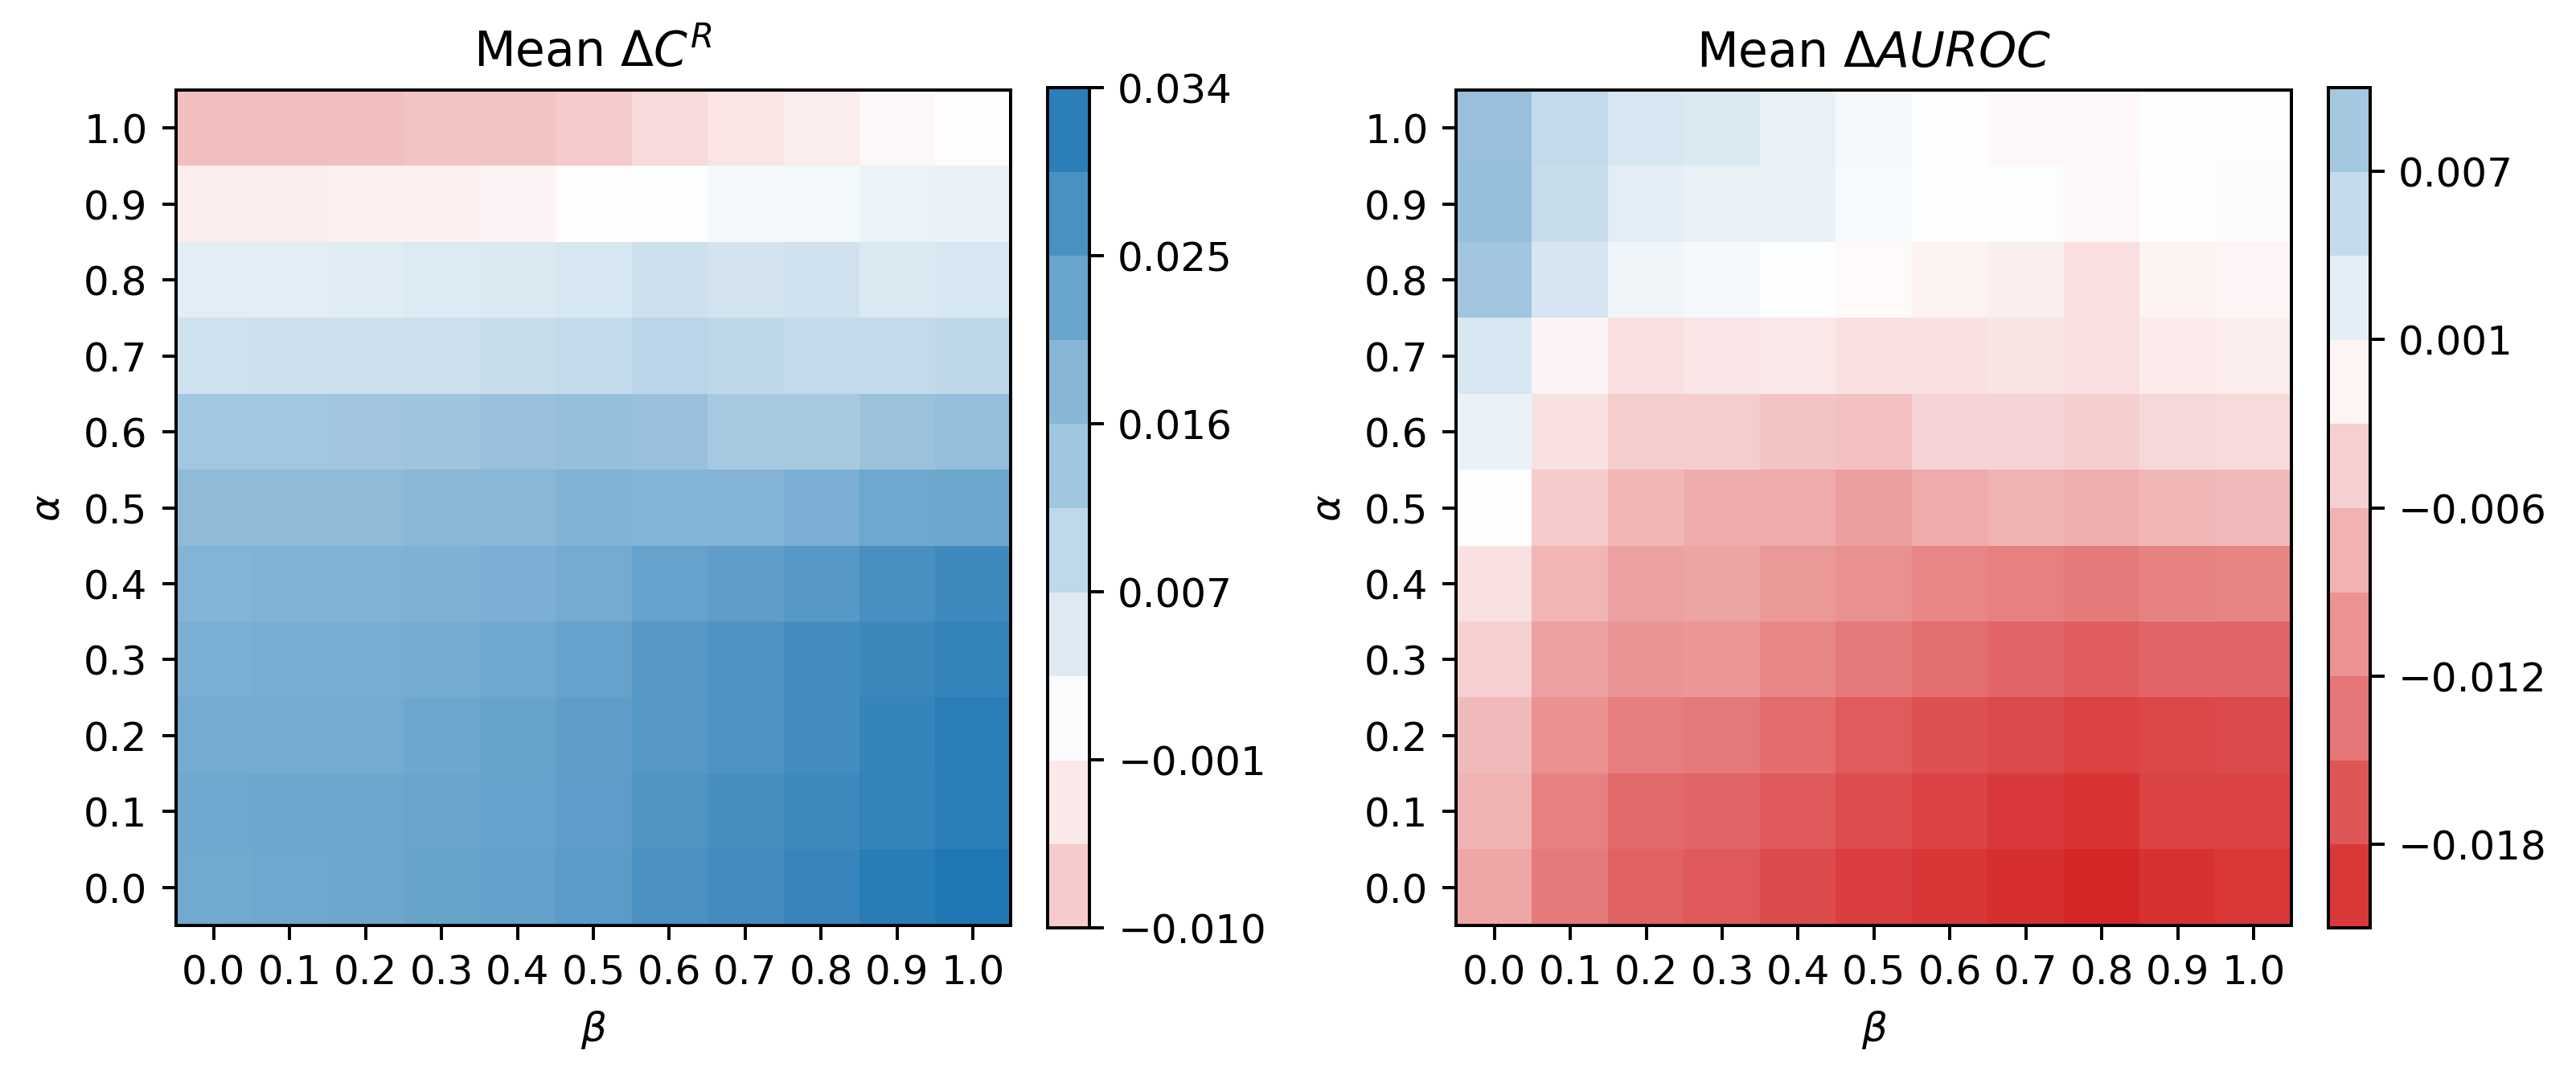

/home/eotles/venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


0    64
1    57
dtype: int64
 0.000022    3
-0.000026    2
-0.000046    2
-0.000401    2
 0.000012    2
            ..
 0.000033    1
 0.000005    1
-0.000181    1
 0.000012    1
 0.000086    1
Length: 113, dtype: int64


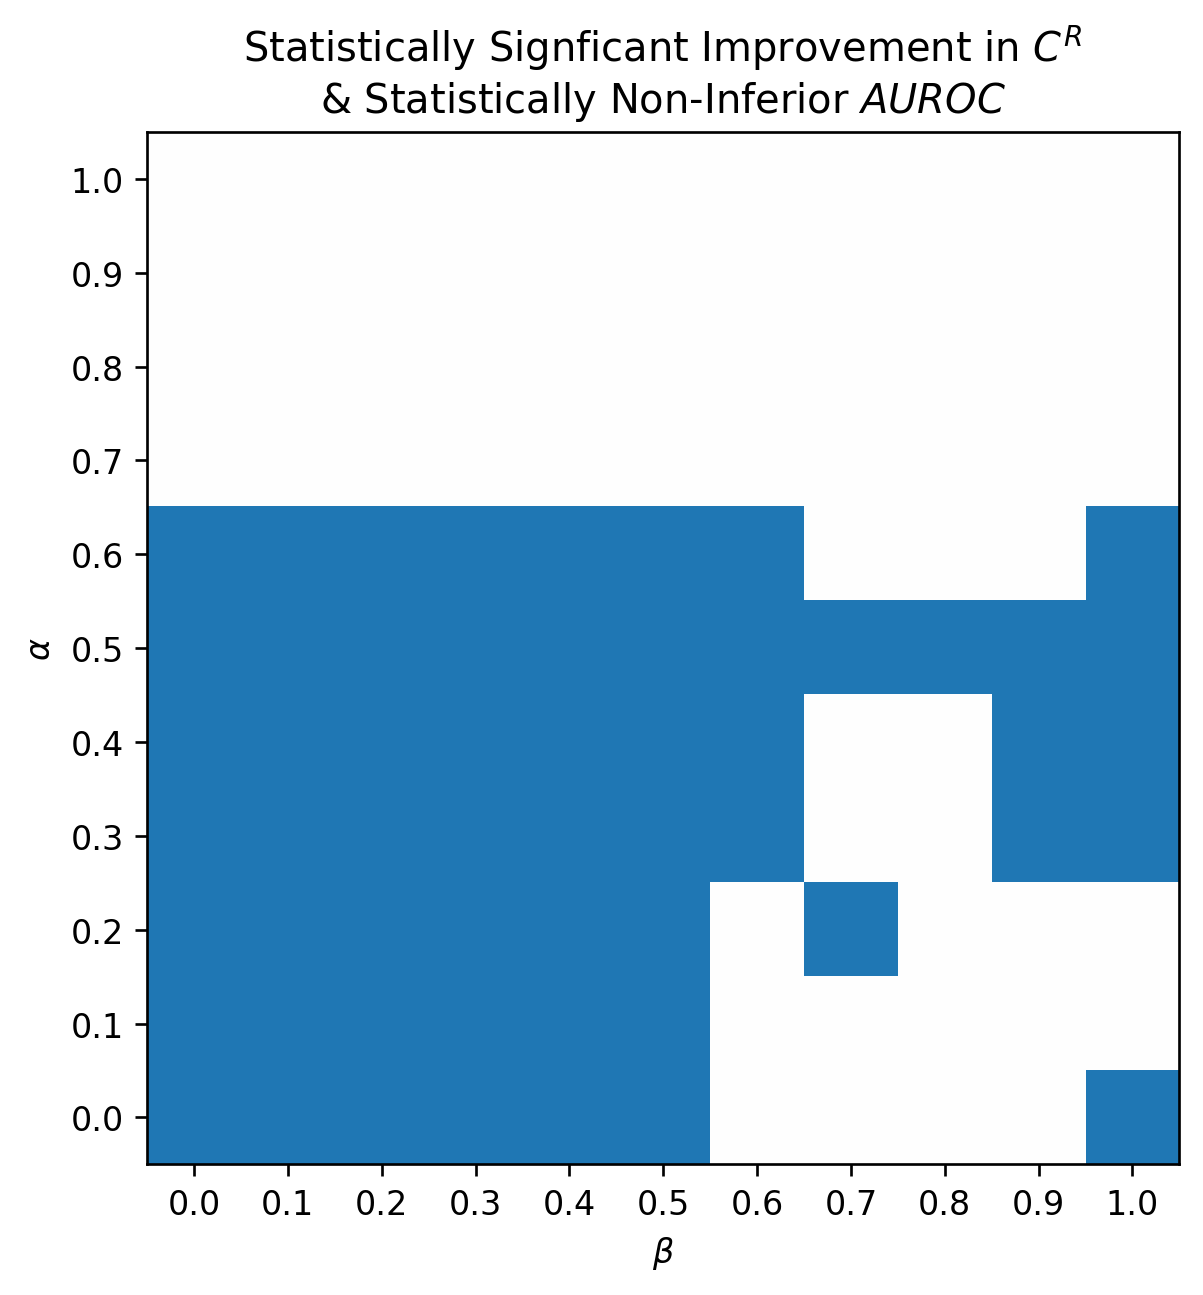

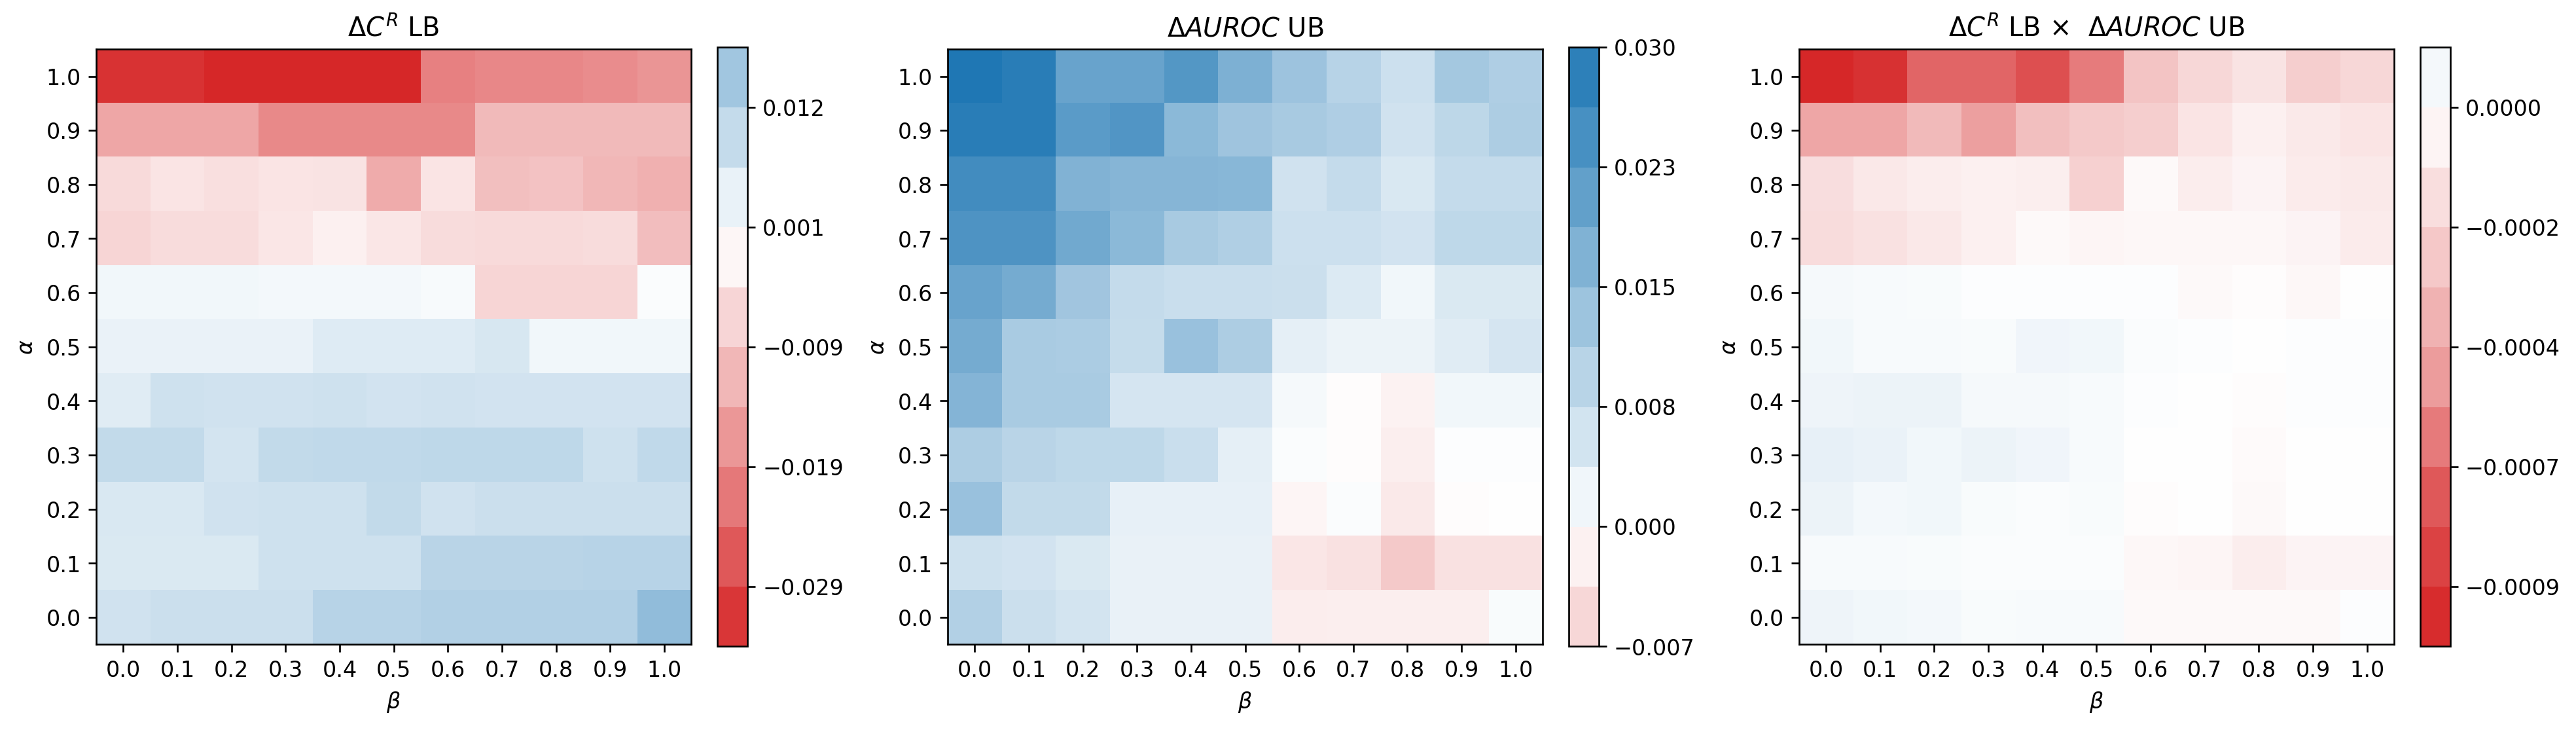

In [17]:
import matplotlib.colors as mcolors

fig, axs = plt.subplots(1, 2, figsize=(2*4.5,4.5), dpi=360)

for ax, column, display_name in zip(axs[:2], [('ΔRBC(e)', 'mean'), ('ΔAUROC(f_u,e)', 'mean')], [r'Mean $\Delta C^R$', r'Mean $\Delta AUROC$']):
   
    
    #norm=plt.Normalize(_[column].min(), _[column].max())
    
    max_abs_dist = max(-_[column].min(), _[column].max())
    
    #norm=mcolors.DivergingNorm(vmin=_[column].min(), vcenter=0, vmax=_[column].max())
    norm=mcolors.DivergingNorm(vmin=-max_abs_dist, vcenter=0, vmax=max_abs_dist)
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["tab:red","white","tab:blue"])
                       
    im = ax.imshow(_[column].unstack().values[::-1,:], 
                   extent=[-0.05,1.05,-0.05,1.05],
                   cmap=cmap, norm=norm)
    cbar = plt.colorbar(im, ax=ax, 
                        fraction=0.046, pad=0.04,
                        boundaries=np.round(np.linspace(_[column].min(), _[column].max(), num=11), 3)
                       )
    #cbar.set_clim(_[column].min(), _[column].max())
    #cbar.ax.set_yticklabels(np.round(np.linspace(_[column].min(), _[column].max(), num=11), 3))
    
    ax.set_xticks(np.arange(0.0, 1.1, 0.1))
    ax.set_yticks(np.arange(0.0, 1.1, 0.1))
    
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(r'$\alpha$')
    
    ax.set_title(display_name)

fig.tight_layout()
plt.show()

    
fig, ax = plt.subplots(1, 1, figsize=(5.5,5.5), dpi=240)

norm=mcolors.DivergingNorm(vmin=-1, vcenter=0, vmax=1)
cmap = mcolors.LinearSegmentedColormap.from_list("", ["tab:red","white","tab:blue"])

__ = 1*((_[('ΔRBC(e)', '2.5%')]>0)*(_[('ΔAUROC(f_u,e)', '97.5%')]>0))
#__ += -1*((_[('ΔRBC(e)', '97.5%')]<0)*(_[('ΔAUROC(f_u,e)', '97.5%')]<0))

print(__.value_counts())
    
im = ax.imshow(__.unstack().values[::-1,:], 
               extent=[-0.05,1.05,-0.05,1.05],
               cmap=cmap, norm=norm)
#cbar = plt.colorbar(im, ax=ax, 
#                    fraction=0.046, pad=0.04,
#                    boundaries=np.round(np.linspace(0, 1, num=3), 1)
#                   )
#cbar.set_clim(_[column].min(), _[column].max())
#cbar.ax.set_yticklabels(np.round(np.linspace(_[column].min(), _[column].max(), num=11), 3))

ax.set_xticks(np.arange(0.0, 1.1, 0.1))
ax.set_yticks(np.arange(0.0, 1.1, 0.1))

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\alpha$')

ax.set_title(r'Statistically Signficant Improvement in $C^R$'
             '\n& Statistically Non-Inferior '
             r'$AUROC$')
    
    
fig.tight_layout()






fig, axs = plt.subplots(1, 3, figsize=(3*5.5,5.5), dpi=240)

for ax, column, display_name in zip(axs[:2], [('ΔRBC(e)', '2.5%'), ('ΔAUROC(f_u,e)', '97.5%')], [r'$\Delta C^R$ LB', r'$\Delta AUROC$ UB']):
   
    
    #norm=plt.Normalize(_[column].min(), _[column].max())
    
    max_abs_dist = max(-_[column].min(), _[column].max())
    
    #norm=mcolors.DivergingNorm(vmin=_[column].min(), vcenter=0, vmax=_[column].max())
    norm=mcolors.DivergingNorm(vmin=-max_abs_dist, vcenter=0, vmax=max_abs_dist)
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["tab:red","white","tab:blue"])
                       
    im = ax.imshow(_[column].unstack().values[::-1,:], 
                   extent=[-0.05,1.05,-0.05,1.05],
                   cmap=cmap, norm=norm)
    cbar = plt.colorbar(im, ax=ax, 
                        fraction=0.046, pad=0.04,
                        boundaries=np.round(np.linspace(_[column].min(), _[column].max(), num=11), 3)
                       )
    #cbar.set_clim(_[column].min(), _[column].max())
    #cbar.ax.set_yticklabels(np.round(np.linspace(_[column].min(), _[column].max(), num=11), 3))
    
    ax.set_xticks(np.arange(0.0, 1.1, 0.1))
    ax.set_yticks(np.arange(0.0, 1.1, 0.1))
    
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(r'$\alpha$')
    
    ax.set_title(display_name)

    
    
ax = axs[2]
    
__ = _[('ΔRBC(e)', '2.5%')]*_[('ΔAUROC(f_u,e)', '97.5%')]


max_abs_dist = max(-__.min(), __.max())

norm=mcolors.DivergingNorm(vmin=-max_abs_dist, vcenter=0, vmax=max_abs_dist)
cmap = mcolors.LinearSegmentedColormap.from_list("", ["tab:red","white","tab:blue"])


print(__.value_counts())
    
im = ax.imshow(__.unstack().values[::-1,:], 
               extent=[-0.05,1.05,-0.05,1.05],
               cmap=cmap, norm=norm)
cbar = plt.colorbar(im, ax=ax, 
                    fraction=0.046, pad=0.04,
                    boundaries=np.round(np.linspace(__.min(), __.max(), num=11), 4)
                   )
#cbar.set_clim(__.min(), __.max())
#cbar.ax.set_yticklabels(np.round(np.linspace(__.min(), __.max(), num=11), 3))

ax.set_xticks(np.arange(0.0, 1.1, 0.1))
ax.set_yticks(np.arange(0.0, 1.1, 0.1))

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\alpha$')

ax.set_title(r'$\Delta C^R$ LB $ \times $  $\Delta AUROC$ UB')
    
    
fig.tight_layout()

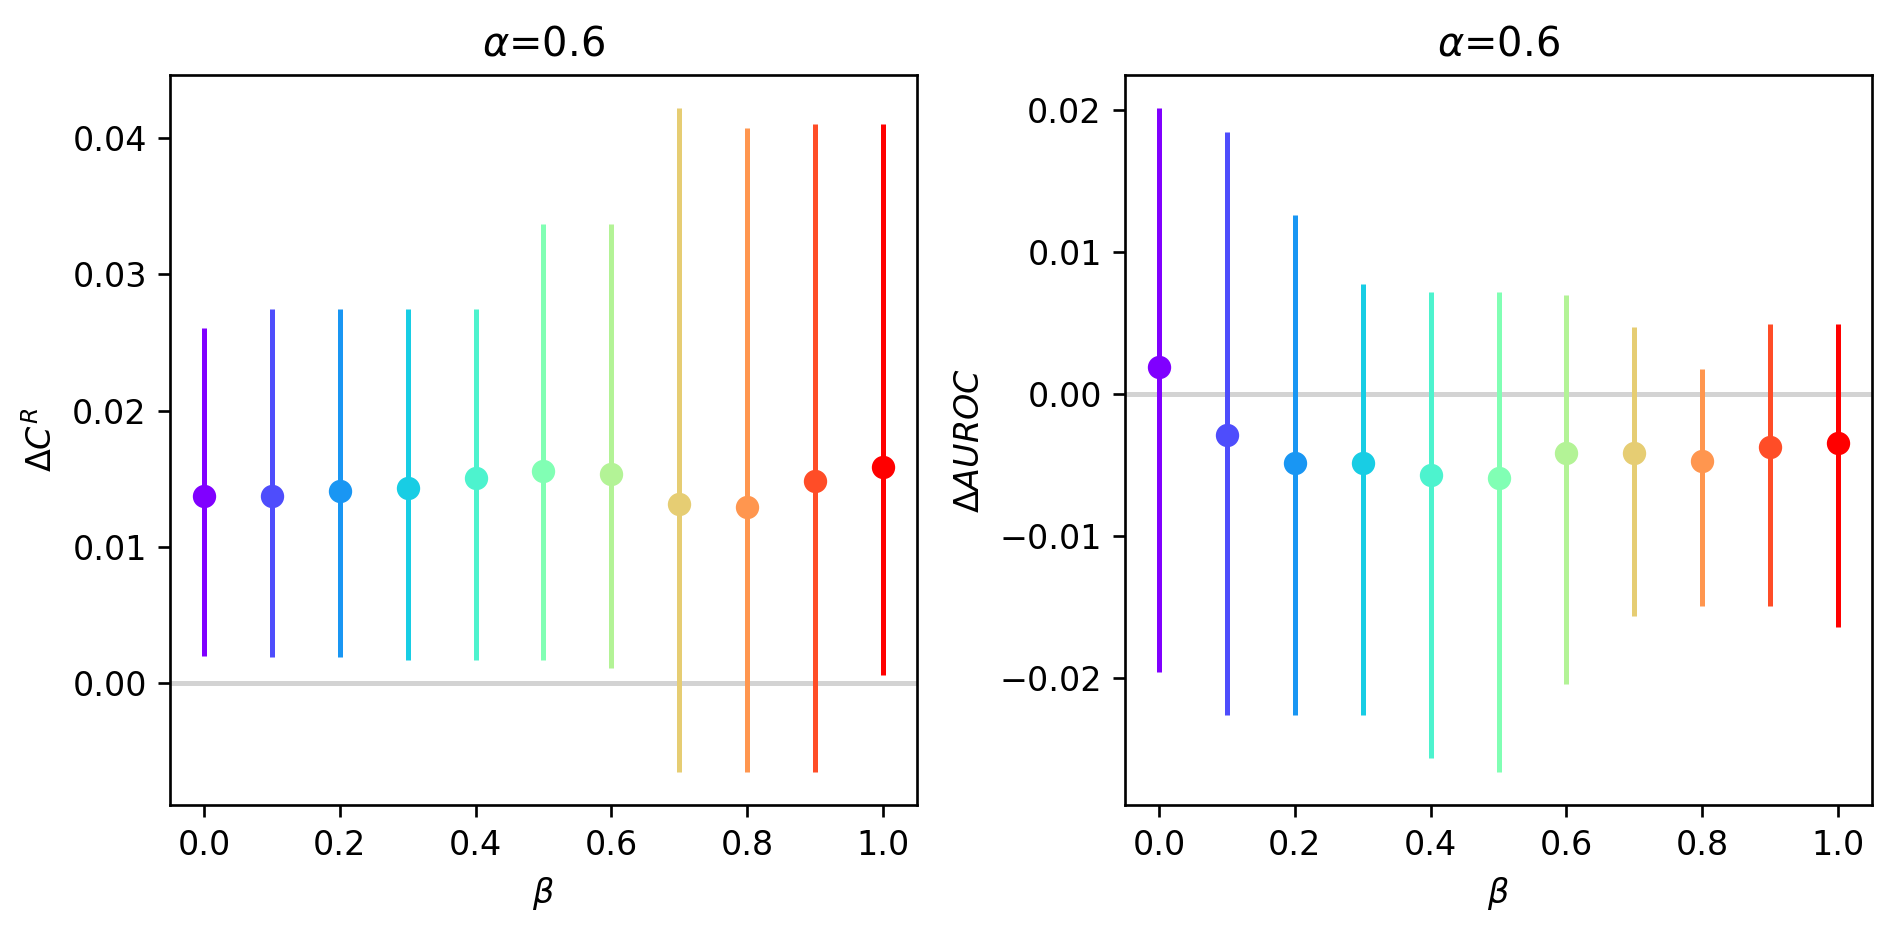

In [18]:
f_u_alpha_opt = '0.6'
_ = comparison_res_df[comparison_res_df['f_u_alpha_opt']==f_u_alpha_opt]
_ = _.groupby('f_u_alpha_sel').describe(percentiles=[0.025, 0.5, 0.975])
_ = _.reset_index()
_['f_u_alpha_sel'] = _['f_u_alpha_sel'].astype(float)

fig, axs = plt.subplots(1, 2, figsize=(2*4,4), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):

    ua.ci_plot(_, ax=ax, x='f_u_alpha_sel',
               y_center=(column, 'mean'), y_lb=(column, '2.5%'), y_ub=(column, '97.5%'), color_value=('f_u_alpha_sel', ''))
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\beta$')
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_title(r'$\alpha$={}'.format(f_u_alpha_opt))

fig.tight_layout()

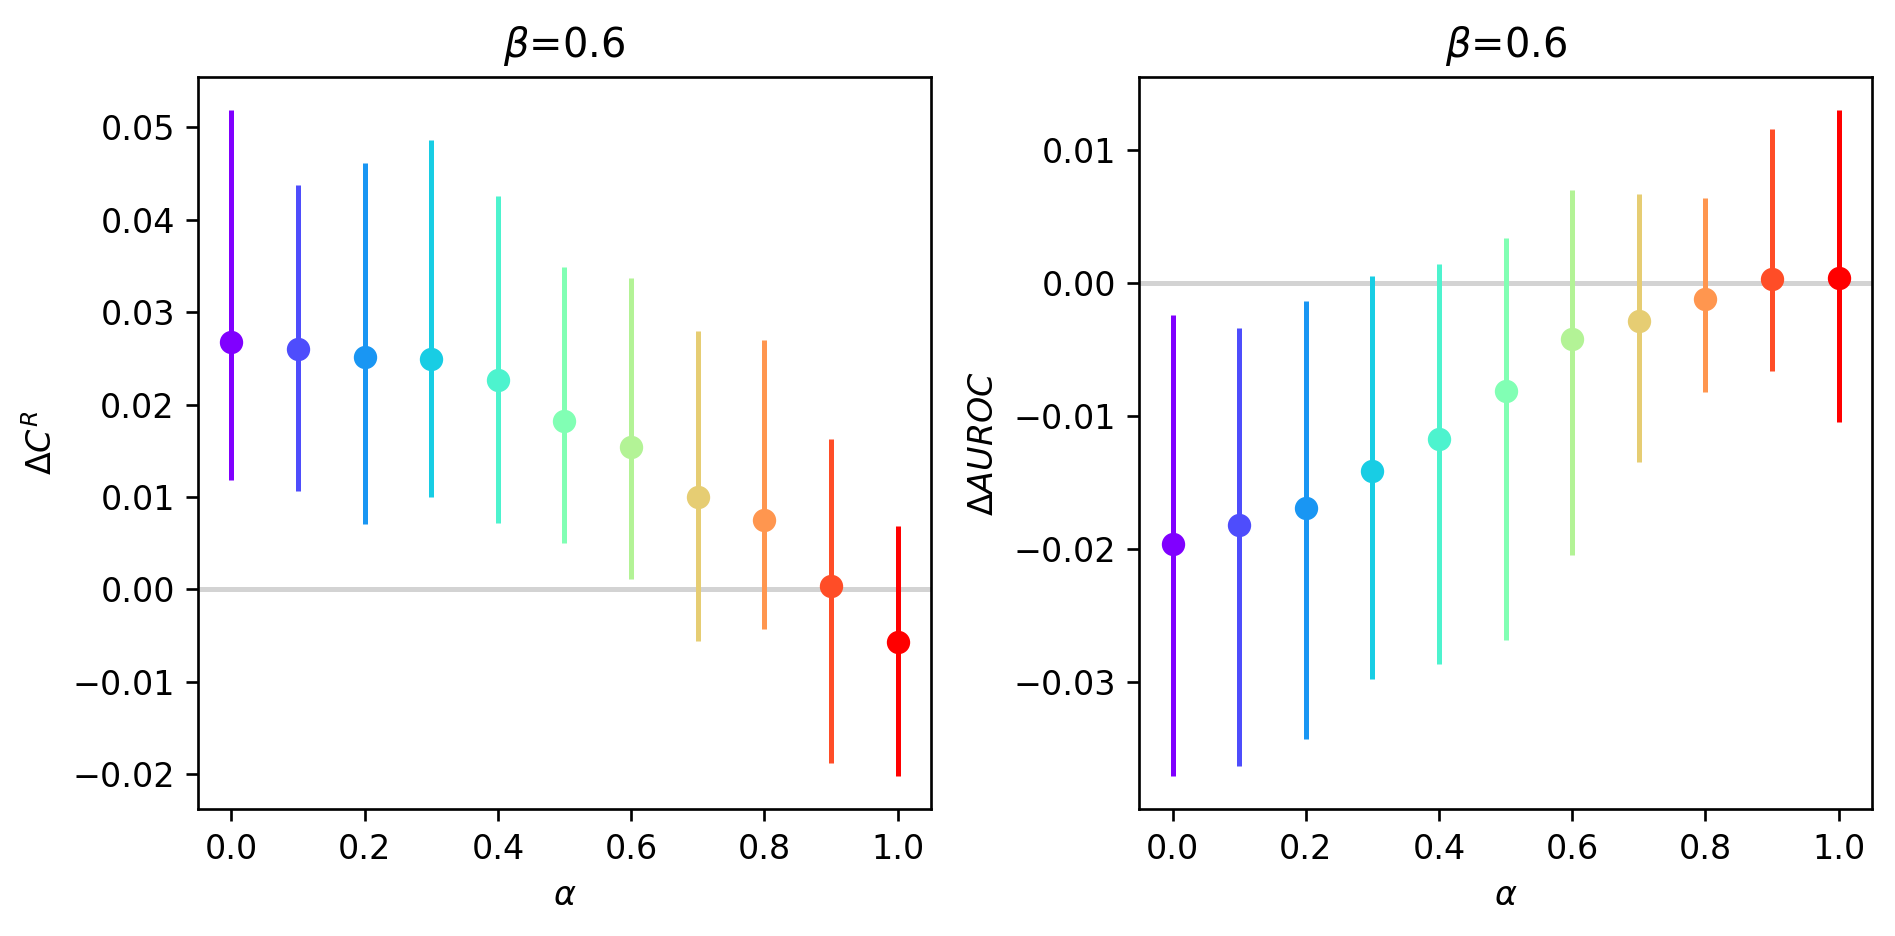

In [19]:
f_u_alpha_sel = '0.6'
_ = comparison_res_df.copy()
_ = _.reset_index()
_ = _[_['f_u_alpha_sel']==f_u_alpha_sel]
_ = _.groupby('f_u_alpha_opt').describe(percentiles=[0.025, 0.5, 0.975])
_ = _.reset_index()
_['f_u_alpha_opt'] = _['f_u_alpha_opt'].astype(float)

fig, axs = plt.subplots(1, 2, figsize=(2*4,4), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):

    ua.ci_plot(_, ax=ax, x='f_u_alpha_opt',
               y_center=(column, 'mean'), y_lb=(column, '2.5%'), y_ub=(column, '97.5%'), color_value=('f_u_alpha_opt', ''))
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_title(r'$\beta$={}'.format(f_u_alpha_sel))

fig.tight_layout()